In [3]:
!pip install pandas-datareader
!pip install numpy
!pip install pandas
!pip install pandas_datareader
!pip install plotly
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 31.0 MB/s eta 0:00:00


In [4]:
import math
from pandas_datareader import data
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import itertools
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from arch import arch_model
plt.style.use('fivethirtyeight')
import datetime
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM

In [51]:
yfin.pdr_override()

gspc = pdr.get_data_yahoo('^GSPC', start='2000-01-01', end='2024-08-15')
avgspc = gspc.resample('M').mean()
avgspc.columns = ['AvgOpen', 'AvgHigh', 'AvgLow', 'AvgClose', 'AvgAdjClose', 'AvgVolume']

print(avgspc)

[*********************100%%**********************]  1 of 1 completed

                AvgOpen      AvgHigh       AvgLow     AvgClose  AvgAdjClose  \
Date                                                                          
2000-01-31  1429.325006  1441.554498  1411.536011  1425.585504  1425.585504   
2000-02-29  1390.275995  1401.426501  1375.809497  1388.874500  1388.874500   
2000-03-31  1436.466951  1455.719562  1423.886947  1442.212599  1442.212599   
2000-04-30  1463.784726  1479.054206  1440.670005  1461.355257  1461.355257   
2000-05-31  1419.925914  1433.121377  1403.576372  1418.479548  1418.479548   
...                 ...          ...          ...          ...          ...   
2024-04-30  5124.729070  5145.566828  5088.249578  5112.492742  5112.492742   
2024-05-31  5231.250422  5251.454102  5211.554577  5235.225497  5235.225497   
2024-06-30  5409.365800  5430.508455  5389.180484  5415.140497  5415.140497   
2024-07-31  5542.529963  5568.595881  5516.108620  5538.004572  5538.004572   
2024-08-31  5330.360937  5380.154053  5287.275977  5

In [52]:
returns = 100 * avgspc.AvgClose.pct_change().dropna()

Text(0.5, 1.0, 'GSPC Returns')

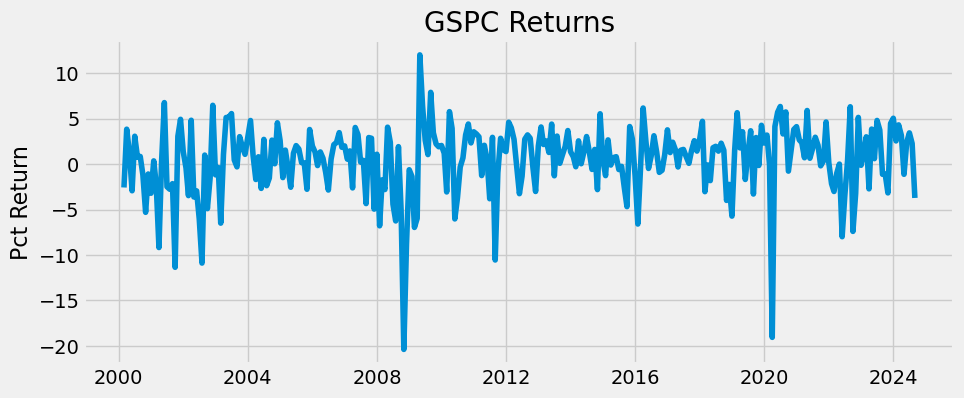

In [53]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('GSPC Returns', fontsize=20)

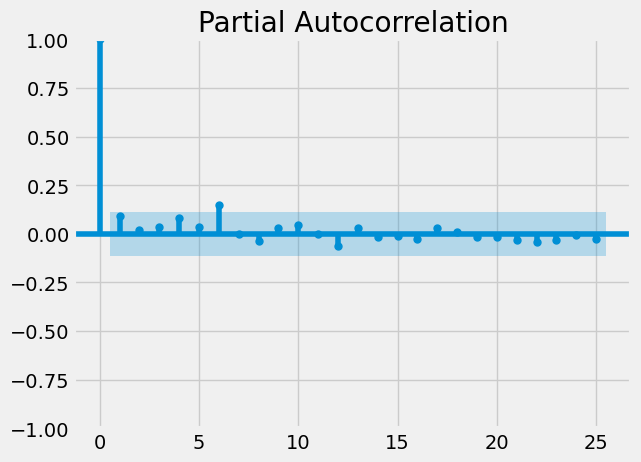

In [54]:
plot_pacf(returns**2)
plt.show()

In [55]:
def select_arch_order(data, max_p, max_q):
    best_aic = np.inf
    best_order = None
    
    # Generate all possible combinations of p and q
    orders = list(itertools.product(range(1, max_p + 1), range(1, max_q + 1)))
    
    for p, q in orders:
        model = arch_model(data, mean='Zero', vol='ARCH', p=p, q=q)
        model_fit = model.fit(disp='off')
        aic = model_fit.aic
        
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
    
    return best_order

In [56]:
select_arch_order(returns, 5, 5)

(4, 1)

In [57]:
model = arch_model(returns, p=4, q=1)

In [58]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 874.4740829038641
Iteration:      2,   Func. Count:     19,   Neg. LLF: 881.2136082700476
Iteration:      3,   Func. Count:     28,   Neg. LLF: 818.0196600351126
Iteration:      4,   Func. Count:     37,   Neg. LLF: 814.4332802293515
Iteration:      5,   Func. Count:     46,   Neg. LLF: 819.5208408128597
Iteration:      6,   Func. Count:     55,   Neg. LLF: 793.8513870736023
Iteration:      7,   Func. Count:     64,   Neg. LLF: 794.5683763679003
Iteration:      8,   Func. Count:     73,   Neg. LLF: 802.099828937251
Iteration:      9,   Func. Count:     82,   Neg. LLF: 792.0507807161919
Iteration:     10,   Func. Count:     91,   Neg. LLF: 798.552681104481
Iteration:     11,   Func. Count:    100,   Neg. LLF: 790.3786399737028
Iteration:     12,   Func. Count:    109,   Neg. LLF: 791.8988304926214
Iteration:     13,   Func. Count:    118,   Neg. LLF: 789.5638851820611
Iteration:     14,   Func. Count:    126,   Neg. LLF: 789.52208873

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               AvgClose   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -789.479
Distribution:                  Normal   AIC:                           1592.96
Method:            Maximum Likelihood   BIC:                           1618.77
                                        No. Observations:                  295
Date:                Mon, Aug 19 2024   Df Residuals:                      294
Time:                        22:40:42   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.6793      0.190      3.579  3.447e-04 [  0.307,  1.051]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.1723      1.307      3.192  1.414e-03    [  1.610,  6.734]
alpha[1]       0.0264  6.934e-02      0.381      0.703    [ -0.109,  0.162]
alpha[2]       0.1977      0.118      1.682  9.258e-02 [-3.268e-02,  0.428]
alpha[3]       0.0640  9.865e-02      0.649      0.517    [ -0.129,  0.257]
alpha[4]       0.5918      0.395      1.500      0.134    [ -0.182,  1.365]
beta[1]        0.0580      0.129      0.450      0.653    [ -0.195,  0.311]
===========================================================================

Covariance estimator: robust
"""

In [60]:
rolling_predictions = []
test_size = 12*24

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=4, q=1)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [61]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-12*24:])
ratio = returns[-12*24:]/rolling_predictions

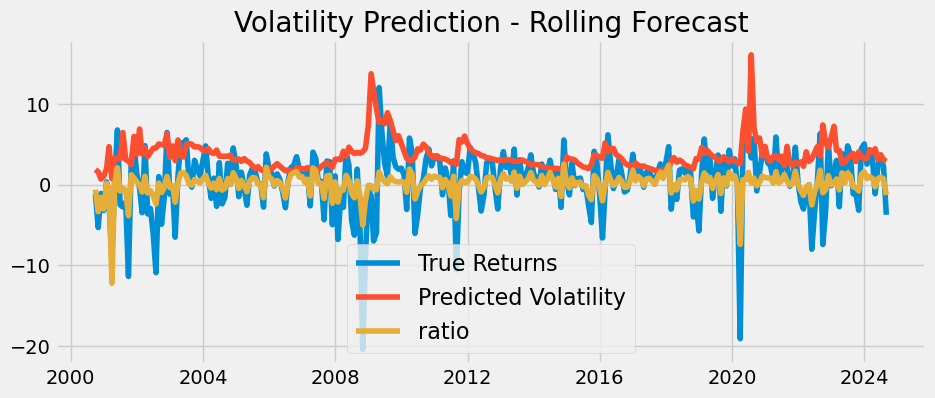

In [62]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-12*24:])
preds, = plt.plot(rolling_predictions)
ratio, = plt.plot(ratio)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility', 'ratio'], fontsize=16)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 months')

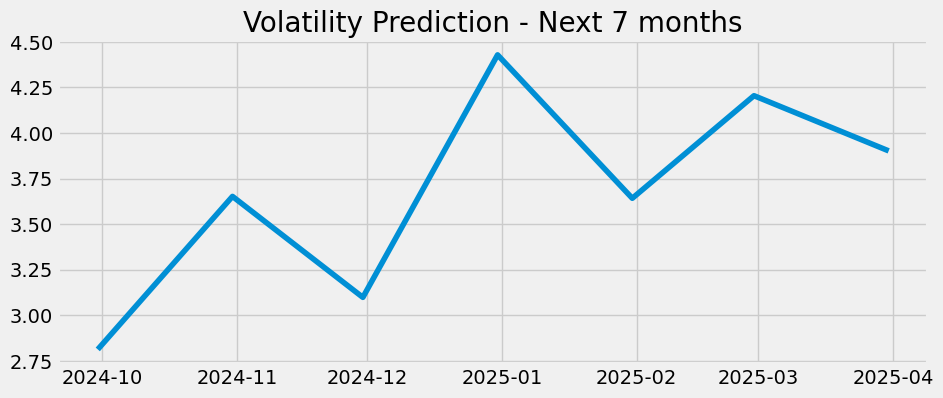

In [63]:
train = returns
model = arch_model(train, p=4, q=1)
model_fit = model.fit(disp='off')

pred = model_fit.forecast(horizon=7)
#future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
future_dates = [returns.index[-1] + relativedelta(months=i) for i in range(1, 8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 months', fontsize=20)

In [61]:
# pred_df = pd.DataFrame(pred)

In [64]:
# Specify the file path and name
# file_path = 'prediction.xlsx'

# y_df = pd.DataFrame(rolling_predictions)

# Export the DataFrame
# my_df.to_excel(file_path, index = True, engine='openpyxl')